## Парламентские выборы в Великобритании 2019 года

В Великобритании парламентские выборы в палату общин проводятся в 650 избирательных округах, которые разделены между 4 частями страны. Эти выборы имеют ключевое значение для формирования политического ландшафта страны.

### Особенности выборов:
- **Количество округов:** 650
- **Части страны:** Англия, Шотландия, Уэльс, Северная Ирландия
- **Непредсказуемость** В некоторых округах конкуренция достигает запредельного уровня, например:
- В 5 избирательных округах на выборах 2019 года победитель выиграл с отрывом менее чем в 200 голосов. В частности это произошло в Кенсингтоне, известном районе Лондона.

Эти данные подчеркивают интенсивную борьбу за каждый голос и значимость явки в каждом избирательном округе.

Index(['ONS ID', 'ONS region ID', 'Constituency name', 'County name',
       'Region name', 'Country name', 'Constituency type', 'Declaration time',
       'Member first name', 'Member surname', 'Member gender', 'Result',
       'First party', 'Second party', 'Electorate', 'Valid votes',
       'Invalid votes', 'Majority', 'Con', 'Lab', 'LD', 'BRX', 'Green', 'SNP',
       'PC', 'DUP', 'SF', 'SDLP', 'UUP', 'APNI', 'All other candidates',
       'Of which other winner'],
      dtype='object')

Bedford из региона East of England. Результат: Lab hold, Второе место: Con, Отрыв: 145 голосов(0.31% голосов)

Bury North из региона North West. Результат: Con gain from Lab, Второе место: Lab, Отрыв: 105 голосов(0.22% голосов)

East Dunbartonshire из региона Scotland. Результат: SNP gain from LD, Второе место: LD, Отрыв: 149 голосов(0.28% голосов)

Fermanagh and South Tyrone из региона Northern Ireland. Результат: SF hold, Второе место: UUP, Отрыв: 57 голосов(0.11% голосов)

Kensington из региона 

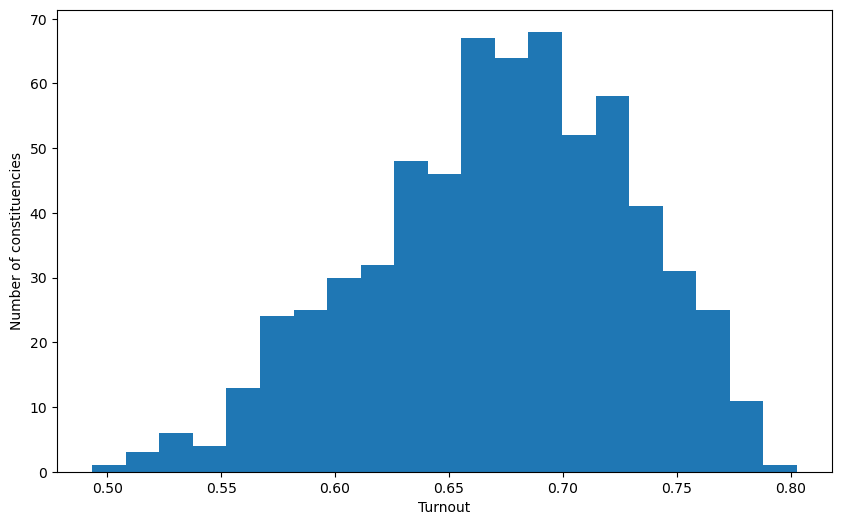

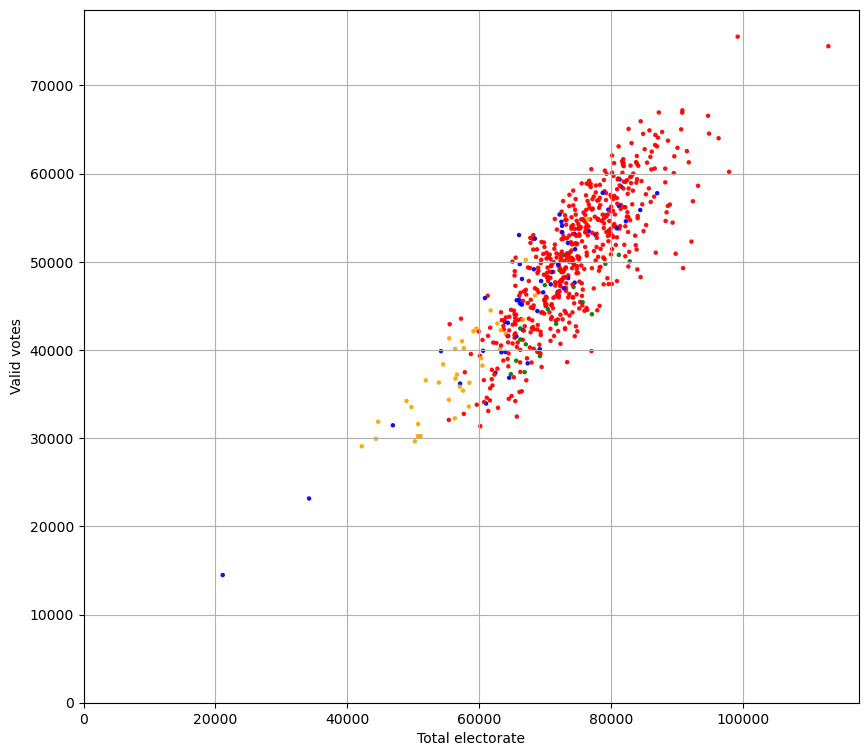

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

file_path = "HoC-GE2019-results-by-constituency.csv"
df = pd.read_csv(file_path)
print(df.columns)

filtered_df = df[df['Majority']<=150]
for index, row in filtered_df.iterrows():
    print(f'\n{row.iloc[2]} из региона {row.iloc[4]}. Результат: {row.iloc[11]}, Второе место: {row.iloc[13]}, Отрыв: {row.iloc[17]} голосов({100*row.iloc[17] / row.iloc[15]:.2f}% голосов)')


df['Country name']= df.iloc[:, 5].replace({'England':'red', 'Wales':'orange', 'Scotland':'blue', 'Northern Ireland':'green'})

numeric_column = pd.to_numeric(df['Electorate'], errors='coerce')
if numeric_column.isnull().any():
    print("\nСтолбец Electorate содержит нечисловые значения.")
else:
    print("\nВсе значения в столбце Electorate являются числами.")
numeric_column = pd.to_numeric(df['Valid votes'], errors='coerce')
if numeric_column.isnull().any():
    print("Столбец Valid votes содержит нечисловые значения.")
else:
    print("Все значения в столбце Valid votes являются числами.")


x_values = df.iloc[:, 14]  
y_values = df.iloc[:, 15] 
z_values = y_values/x_values
sum_x = sum(x_values)
sum_y = sum(y_values)
print(f"\n\nИзбирателей всего: {sum_x}, Проголосовало: {sum_y}, Явка - {100*sum_y/sum_x:.1f}%")
print(f"Минимальная явка - {100*np.min(z_values):.2f}%, Максимальная явка - {100*np.max(z_values):.2f}%")

plt.figure(figsize=(10, 6))
plt.hist(z_values, bins=21)
plt.xlabel('Turnout')
plt.ylabel('Number of constituencies')
plt.title('')
plt.show()

plt.figure(figsize=(10, 9)) 
plt.scatter(x_values, y_values, c=df['Country name'],  s=5, alpha=0.9)  
plt.title('')  
plt.xlabel('Total electorate') 
plt.ylabel('Valid votes')
plt.xlim(0, ) 
plt.ylim(0, ) 
plt.grid(True) 
plt.show() 

## Анализ явки избирателей на выборах в Великобритании

Результаты явки в 2019 году показывают интересные региональные различия, которые могут влиять на исходы выборов и политическую карту страны.

### Общие наблюдения:
- В большинстве городов наблюдается **низкая явка** избирателей.
- В провинциальных районах явка обычно **выше**, чем в городах.
- Кроме того разброс явки по округам велик от 49% до 80%.
- Отдельно стоит отметить **Северную Ирландию**, где по стране самая низкая явка, а также:
  - **Явка минимальна** в провинции
  - **Явка чуть выше** в городах

### Влияние на политическую карту:
Эти различия в явке могут существенно повлиять на распределение голосов и исходы выборов в отдельных округах, особенно в районах с высокой конкуренцией.

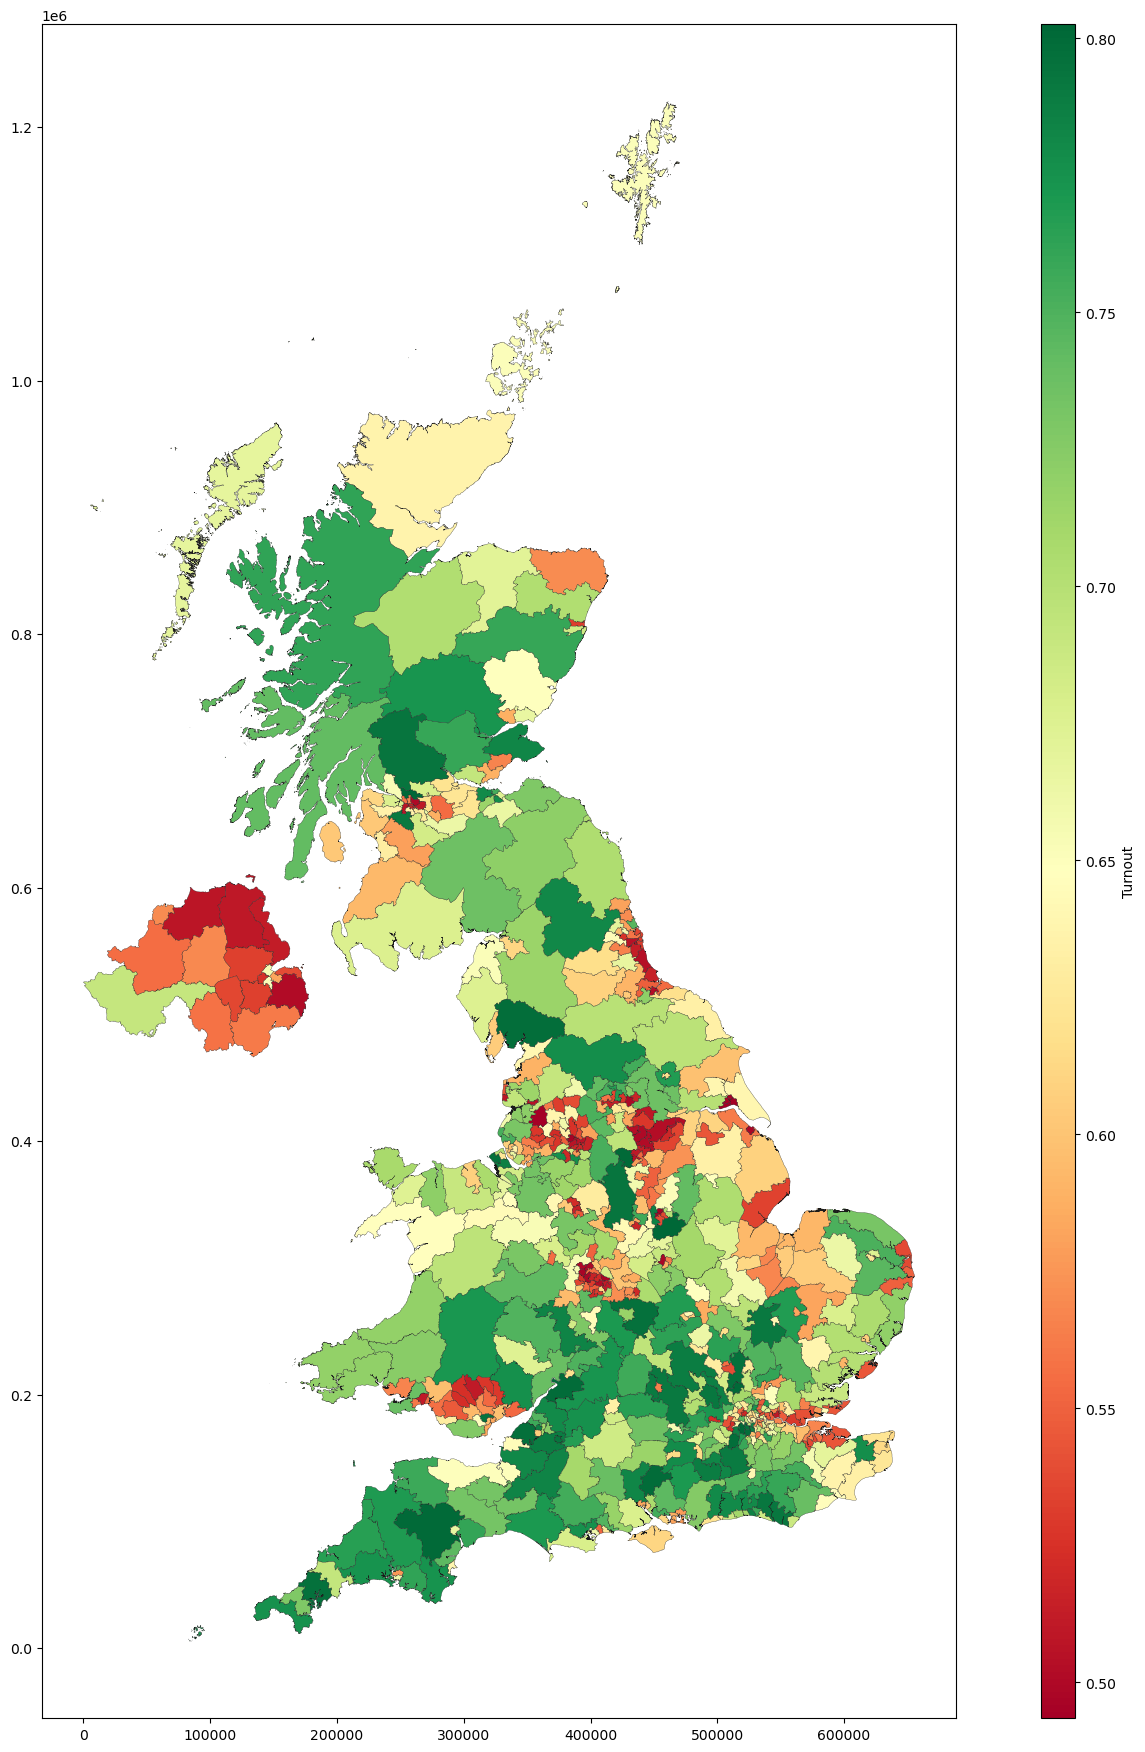

In [16]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm

file_path = "HoC-GE2019-results-by-constituency.csv"
df = pd.read_csv(file_path)
x_values = df.iloc[:, 14]  
y_values = df.iloc[:, 15] 
z_values = y_values/x_values

elections = gpd.read_file('WPC_Dec_2019.geojson')
new_array = np.column_stack((df.iloc[:, 0], z_values))
turnout = pd.DataFrame(new_array, columns=['pcon19cd', 'turnout_percentage'])
merged_data = elections.merge(turnout, on='pcon19cd', how='left')
fig, ax = plt.subplots(figsize=(22, 22))

merged_data.plot(ax=ax, column='turnout_percentage', cmap='RdYlGn', linewidth=0.2, edgecolor='0.1',figsize=(22,22))
norm = Normalize(vmin=merged_data['turnout_percentage'].min(), vmax=merged_data['turnout_percentage'].max())
sm = cm.ScalarMappable(cmap='RdYlGn', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', shrink=1, aspect=50, pad=0.05)
cbar.set_label('Turnout')
plt.show()


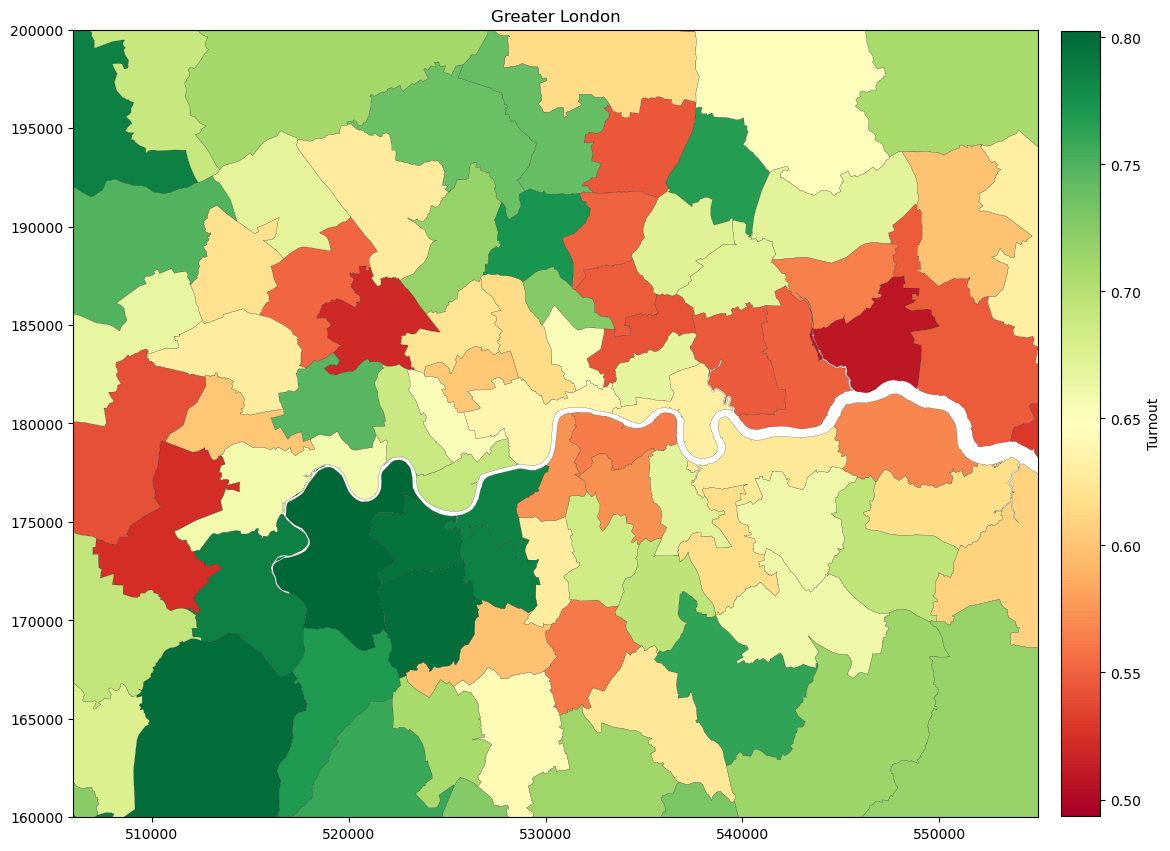

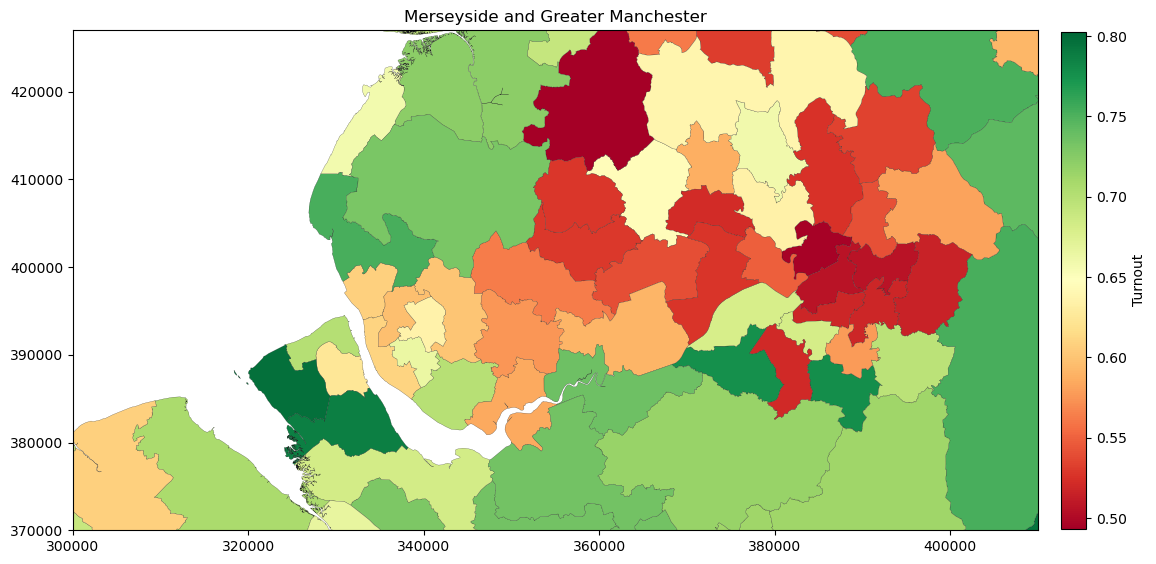

In [13]:
fig, ax = plt.subplots(figsize=(15, 15))  
ax.set_xlim(506000, 555000)  
ax.set_ylim(160000, 200000)
merged_data.plot(ax=ax, column='turnout_percentage', cmap='RdYlGn', linewidth=0.15, edgecolor='0.1')  
norm = Normalize(vmin=merged_data['turnout_percentage'].min(), vmax=merged_data['turnout_percentage'].max())
sm = cm.ScalarMappable(cmap='RdYlGn', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', shrink=0.68, aspect=20, pad=0.02)  
cbar.set_label('Turnout')  
ax.set_title('Greater London')  
plt.show()  

fig, ax = plt.subplots(figsize=(15, 15))  
ax.set_xlim(300000, 410000)  
ax.set_ylim(370000, 427000) 
merged_data.plot(ax=ax, column='turnout_percentage', cmap='RdYlGn', linewidth=0.15, edgecolor='0.1')  
norm = Normalize(vmin=merged_data['turnout_percentage'].min(), vmax=merged_data['turnout_percentage'].max())
sm = cm.ScalarMappable(cmap='RdYlGn', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', shrink=0.43, aspect=20, pad=0.02)  
cbar.set_label('Turnout')  
ax.set_title('Merseyside and Greater Manchester') 
plt.show()   

## Анализ явки избирателей в крупных городах Великобритании

Явка избирателей в крупных городах Великобритании, таких как Лондон, Ливерпуль и Манчестер, показывает высокую степень непредсказуемости. Это может быть обусловлено разнообразием районов и демографическим составом населения.

### Особенности явки в городах:
- **Разнообразие районов**: В городах существуют спальные районы, промышленные районы, районы с высоким или низким уровнем доходов. Эти различия вносят свой вклад в непредсказуемость явки.
- **Демографический состав**: В пригородах таких городов, как Лондон, доля жителей, родившихся вне Великобритании, может превышать 50%. Это также существенно влияет на явку избирателей.

### Сравнение с сельской местностью:
- **Простота прогнозирования**: В сельской местности явка более предсказуема благодаря более однородному составу населения и более стабильным социально-экономическим условиям.



В Northern Ireland избирателей всего: 1293971, Проголосовало: 799035, Явка - 61.8%
Degree 1: Mean adj R^2 = 0.532
Degree 2: Mean adj R^2 = 0.205
Degree 3: Mean adj R^2 = -0.189
Degree 4: Mean adj R^2 = -inf
Degree 5: Mean adj R^2 = -inf
Best degree: 1 with Best adj R^2: 0.532
RMSE для каждого из 4 фолдов: 1526 3991 2839 2407 Средний RMSE для Northern Ireland: 2691
MAE для каждого из 4 фолдов: 1448 3530 2338 1917 Средний MAE для Northern Ireland: 2308
R^2 для каждого из 4 фолдов: 0.45 0.22 0.81 0.65 Средний R^2 для Northern Ireland: 0.532
adj R^2 для каждого из 4 фолдов: 0.45 0.22 0.81 0.65 Средний adj R^2 для Northern Ireland: 0.532

В Wales избирателей всего: 2319826, Проголосовало: 1544357, Явка - 66.6%
Degree 1: Mean adj R^2 = 0.707
Degree 2: Mean adj R^2 = 0.642
Degree 3: Mean adj R^2 = 0.627
Degree 4: Mean adj R^2 = 0.571
Degree 5: Mean adj R^2 = 0.416
Best degree: 1 with Best adj R^2: 0.707
RMSE для каждого из 4 фолдов: 2067 3448 3777 3066 Средний RMSE для Wales: 3089
MAE для ка

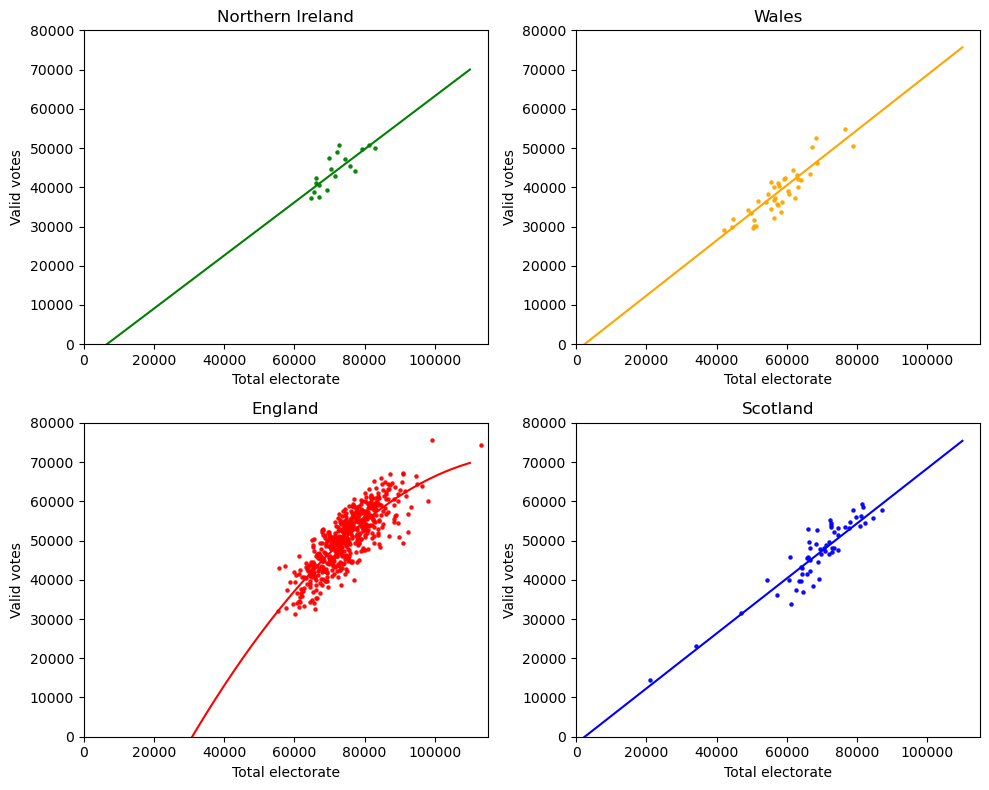

In [114]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.base import clone
from sklearn.linear_model import Lasso
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, make_scorer
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import  StandardScaler, PolynomialFeatures
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

def adjusted_r2_score(y_true, y_pred, n, p):
    r2 = r2_score(y_true, y_pred)
    if n <= p:
        return -np.inf
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p))
    return adjusted_r2

def r2_score_adj(y_true, y_pred, best):
    n = len(y_true)
    p = best
    if n <= p:
        return -np.inf
    r2 = r2_score(y_true, y_pred)
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p))
    return adjusted_r2

file_path = "HoC-GE2019-results-by-constituency.csv"
df = pd.read_csv(file_path)
df['Country name']= df.iloc[:, 5].replace({'England':'red', 'Wales':'orange', 'Scotland':'blue', 'Northern Ireland':'green'})

NorthIr = df.loc[df['Country name'] == 'green']
wales = df.loc[df['Country name'] == 'orange']
england = df.loc[df['Country name'] == 'red']
scotland = df.loc[df['Country name'] == 'blue']

n_splits = 4
def plot_distribution(df, subplot_num, name, clr):
    
    x_values = df.iloc[:, 14]  
    y_values = df.iloc[:, 15]  
    xsum = sum(x_values)
    ysum = sum(y_values)
    print(f"\nВ {name} избирателей всего: {xsum}, Проголосовало: {ysum}, Явка - {100*ysum/xsum:.1f}%")

    plt.subplot(2, 2, subplot_num)
    plt.scatter(x_values, y_values, s=5, alpha=0.9, c = clr)  

    X, y = df[['Electorate']], df['Valid votes']
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=19)
    
    degrees = list(range(1, 6))
    best_degree = None
    best_rmse = np.inf
    best_r2 = -np.inf
    for degree in degrees:
        pipeline = Pipeline([('poly', PolynomialFeatures(degree=degree, include_bias=False)),
        ('scaler', StandardScaler()),
        ('reg',  LinearRegression())   
        #('reg',  Ridge(alpha=0.40,  fit_intercept=True))                      
        #('reg',  Lasso(alpha=20, max_iter=30000, fit_intercept=True))
        ])
        rmse_scores = []
        r2_scores = []
        for train_index, test_index in kf.split(X):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            pipeline.fit(X_train, y_train)
            y_pred = pipeline.predict(X_test)
            p = degree
            n = len(y_test)
            r2 =  adjusted_r2_score(y_test, y_pred, n, p)
            mse = mean_squared_error(y_test, y_pred)
            rmse = np.sqrt(mse)
            #mae = mean_absolute_error(y_test, y_pred)
            r2_scores.append(r2)
            rmse_scores.append(rmse)
        rmse_mean = np.mean(rmse_scores)
        r2_mean = np.mean(r2_scores)
        print(f"Degree {degree}: Mean adj R^2 = {r2_mean:.3f}")
        
        if r2_mean > best_r2:
            best_r2 = r2_mean
            best_degree = degree

    print(f"Best degree: {best_degree} with Best adj R^2: {best_r2:.3f}")
    
    rmse_scores = []
    mae_scores = []
    r2_scores = []
    adj_r2_scores = []
    ans = []
    ind = 0

    for train_index, test_index in kf.split(df):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        best_pipeline = Pipeline([('poly', PolynomialFeatures(degree=best_degree, include_bias=False)),
        ('scaler', StandardScaler()),
        ('reg',  LinearRegression())  
        #('reg',  Ridge(alpha=0.40, fit_intercept=True))   
        #('reg',  Lasso(alpha=20, max_iter=30000, fit_intercept=True))
        ])
        best_pipeline.fit(X_train, y_train)
        y_pred = best_pipeline.predict(X_test)
        coef = best_pipeline.named_steps['reg'].coef_
        intercept = best_pipeline.named_steps['reg'].intercept_
        coef = np.append(coef, intercept)
        #print(coef)
        ans.append(coef)
        mae = mean_absolute_error(y_test, y_pred)
        mae_scores.append(mae)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)
        r2 = r2_score(y_test, y_pred)
        r2_scores.append(r2)
        adj_r2 = r2_score_adj(y_test, y_pred, best_degree)
        adj_r2_scores.append(adj_r2)
        ind += 1
        if ind == 2:
            X_curve = np.linspace(0, 110000, 300)
            df_curve = pd.DataFrame(X_curve, columns=['Electorate'])
            df_curve = df_curve.copy()
            y_curve = best_pipeline.predict(df_curve)
            plt.plot(df_curve, y_curve, color=clr)
    print(f"RMSE для каждого из {n_splits} фолдов:", end = " ")
    for num in rmse_scores:
        print("{:.0f}".format(num), end=" ")
    print(f"Средний RMSE для {name}: {np.mean(rmse_scores):.0f}")

    print(f"MAE для каждого из {n_splits} фолдов:", end = " ")
    for num in mae_scores:
        print("{:.0f}".format(num), end=" ")
    print(f"Средний MAE для {name}: {np.mean(mae_scores):.0f}")
    
    print(f"R^2 для каждого из {n_splits} фолдов:", end = " ")
    for num in r2_scores:
        print("{:.2f}".format(num), end=" ")
    print(f"Средний R^2 для {name}: {np.mean(r2_scores):.3f}")
    
    print(f"adj R^2 для каждого из {n_splits} фолдов:", end = " ")
    for num in adj_r2_scores:
        print("{:.2f}".format(num), end=" ")
    print(f"Средний adj R^2 для {name}: {np.mean(adj_r2_scores):.3f}")
    
    plt.xlim(0, 115000)  
    plt.ylim(0, 80000)
    plt.xlabel('Total electorate') 
    plt.ylabel('Valid votes')
    plt.title(name)
    
plt.figure(figsize=(10, 8))
plot_distribution(NorthIr, 1, 'Northern Ireland', NorthIr.iloc[0, 5])
plot_distribution(wales, 2, 'Wales', wales.iloc[0, 5])
plot_distribution(england, 3, 'England', england.iloc[0, 5])
plot_distribution(scotland, 4, 'Scotland', scotland.iloc[0, 5])

plt.tight_layout()
plt.show()

## Анализ явки на выборах с использованием модели линейной регрессии

### Скорректированный \( R^2 \) в линейной регрессии

Скорректированный \( R^2 \) — это версия  \( R^2 \), адаптированная для учета числа предикторов в модели. Этот показатель корректирует исходный \( R^2 \) с учетом количества переменных в модели, что помогает предотвратить его искусственное увеличение при добавлении новых предикторов. В отличие от обычного \( R^2 \), скорректированный \( R^2 \) уменьшается, если добавленный предиктор не улучшает модель в достаточной степени.

### Применение модели линейной регрессии для анализа явки

Используя эту модель мы видим, при большом количестве избирателей в Англии появляются аномальные округа с низкой явкой, кроме того в Borough при увелечении числа избирателей растёт отклонение модели. Напротив в County явка ведёт себя стабильнее всего.


В Borough избирателей всего: 19218570, Проголосовало: 12496287, Явка - 65.0%
Degree 1: Mean Adjusted R² = 0.687
Degree 2: Mean Adjusted R² = 0.698
Degree 3: Mean Adjusted R² = 0.682
Degree 4: Mean Adjusted R² = 0.675
Degree 5: Mean Adjusted R² = 0.669
Degree 6: Mean Adjusted R² = 0.666
Degree 7: Mean Adjusted R² = 0.665
Best degree: 2 with Best Adjusted R²: 0.698
RMSE для каждого из 5 фолдов: 4562 3716 3748 4313 3386 Средний RMSE для Borough: 3945
R^2 для каждого из 5 фолдов: 0.691 0.666 0.733 0.719 0.712 Средний R^2 для Borough: 0.704
adj R^2 для каждого из 5 фолдов: 0.684 0.659 0.728 0.713 0.707 Средний adj R^2 для Borough: 0.698

В Burgh избирателей всего: 1298206, Проголосовало: 852626, Явка - 65.7%
Degree 1: Mean Adjusted R² = 0.520
Degree 2: Mean Adjusted R² = 0.185
Degree 3: Mean Adjusted R² = -inf
Degree 4: Mean Adjusted R² = -inf
Degree 5: Mean Adjusted R² = -inf
Degree 6: Mean Adjusted R² = -inf
Degree 7: Mean Adjusted R² = -inf
Best degree: 1 with Best Adjusted R²: 0.520
RM

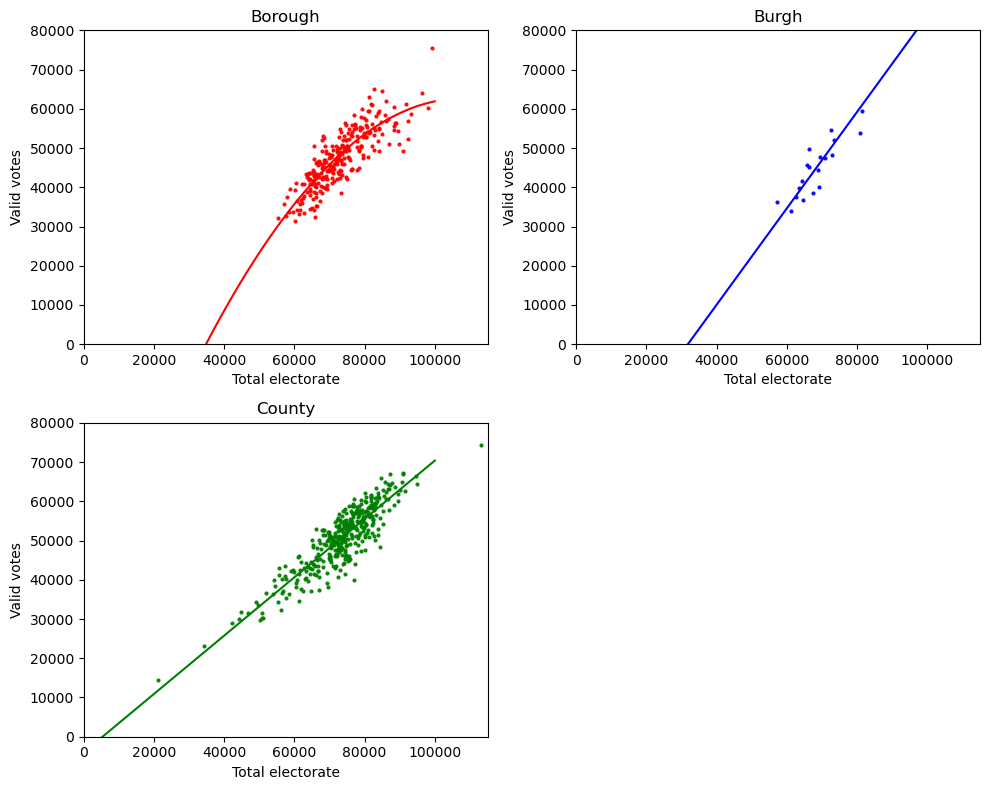

In [112]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.base import clone
from sklearn.linear_model import Lasso
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, make_scorer
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

def adjusted_r2_score(y_true, y_pred, n, p):
    r2 = r2_score(y_true, y_pred)
    if n <= p:
        return -np.inf
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p))
    return adjusted_r2

def r2_score_adj(y_true, y_pred, best):
    n = len(y_true)
    p = best
    r2 = r2_score(y_true, y_pred)
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p))
    return adjusted_r2



file_path = "HoC-GE2019-results-by-constituency.csv"
df = pd.read_csv(file_path)

borough = df.loc[df['Constituency type'] == 'Borough']
burgh = df.loc[df['Constituency type'] == 'Burgh']
county = df.loc[df['Constituency type'] == 'County']

n_splits=5
def plot_distribution(df, subplot_num, name, clr):
    x_values = df.iloc[:, 14]  
    y_values = df.iloc[:, 15]  
    xsum = sum(x_values)
    ysum = sum(y_values)
    print(f"\nВ {name} избирателей всего: {xsum}, Проголосовало: {ysum}, Явка - {100*ysum/xsum:.1f}%")
    
    #model = Lasso(alpha = 7000000)
    #model = HuberRegressor(epsilon=2000)
    #model = Ridge(alpha=1000000000)
    plt.subplot(2, 2, subplot_num)
    plt.scatter(x_values, y_values, s=4, alpha=0.9, c = clr)  
 
    X, y = df[['Electorate']], df['Valid votes']
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=21)
    

    degrees = list(range(1, 8))
    best_degree = None
    best_r2 = -np.inf

    for degree in degrees:
        pipeline = Pipeline([('poly', PolynomialFeatures(degree=degree, include_bias=False)),
        ('lin_reg', LinearRegression())
        ])
        r2_scores = []
        for train_index, test_index in kf.split(X):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            pipeline.fit(X_train, y_train)
            y_pred = pipeline.predict(X_test)
            p = degree
            n = len(y_test)
            r2 = adjusted_r2_score(y_test, y_pred, n, p)
            r2_scores.append(r2)
        mean_r2 = np.mean(r2_scores)
        print(f"Degree {degree}: Mean Adjusted R² = {mean_r2:.3f}")
        
        if mean_r2 > best_r2:
            best_r2 = mean_r2
            best_degree = degree

    print(f"Best degree: {best_degree} with Best Adjusted R²: {best_r2:.3f}")
    rmse_scores = []
    r2_scores = []
    adj_r2_scores = []
    ans = []
    ind = 0
    
    for train_index, test_index in kf.split(X):
        
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        best_pipeline = Pipeline([('poly', PolynomialFeatures(degree=best_degree, include_bias=False)),
        ('lin_reg', LinearRegression())
        ])
        best_pipeline.fit(X_train, y_train)
        y_pred = best_pipeline.predict(X_test)
        coef = best_pipeline.named_steps['lin_reg'].coef_
        intercept = best_pipeline.named_steps['lin_reg'].intercept_
        coef = np.append(coef, intercept)
        #print(coef)
        ans.append(coef)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)
        r2 = r2_score(y_test, y_pred)
        r2_scores.append(r2)
        adj_r2 = r2_score_adj(y_test, y_pred, best_degree)
        adj_r2_scores.append(adj_r2)
        ind += 1
        if ind == 1:
            X_curve = np.linspace(0, 100000, 300)
            df_curve = pd.DataFrame(X_curve, columns=['Electorate'])
            df_curve = df_curve.copy()
            y_curve = best_pipeline.predict(df_curve)
            plt.plot(df_curve, y_curve, color=clr)
    print(f"RMSE для каждого из {n_splits} фолдов:", end = " ")
    for num in rmse_scores:
        print("{:.0f}".format(num), end=" ")
    print(f"Средний RMSE для {name}: {np.mean(rmse_scores):.0f}")

    print(f"R^2 для каждого из {n_splits} фолдов:", end = " ")
    for num in r2_scores:
        print("{:.3f}".format(num), end=" ")
    print(f"Средний R^2 для {name}: {np.mean(r2_scores):.3f}")

    print(f"adj R^2 для каждого из {n_splits} фолдов:", end = " ")
    for num in adj_r2_scores:
        print("{:.3f}".format(num), end=" ")
    print(f"Средний adj R^2 для {name}: {np.mean(adj_r2_scores):.3f}")
    

    
    plt.xlim(0, 115000)  
    plt.ylim(0, 80000)
    plt.xlabel('Total electorate') 
    plt.ylabel('Valid votes')
    plt.title(name)
    
plt.figure(figsize=(10, 8))
plot_distribution(borough, 1, 'Borough', 'red')
plot_distribution(burgh, 2, 'Burgh', 'blue')
plot_distribution(county, 3, 'County', 'green')
plt.tight_layout()
plt.show()

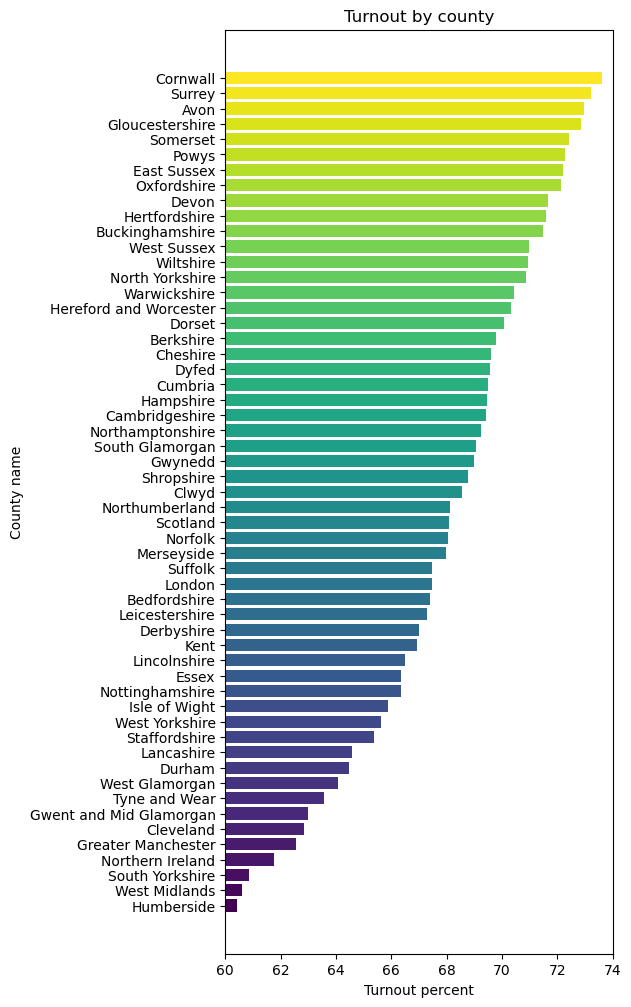

In [115]:
import pandas as pd

grouped = df.groupby(df.iloc[:, 3])
turnout=[]
for name, group in grouped:
    x_values = group.iloc[:, 14]  
    y_values = group.iloc[:, 15]
    xsum = sum(x_values)
    ysum = sum(y_values)
    turnout.append((100*ysum/xsum, name))
plt.figure(figsize=(5, 12))
sorted_turnout = sorted(turnout, key=lambda x: x[0])

percentages = [t[0] for t in sorted_turnout]
names = [t[1] for t in sorted_turnout]
colors = plt.cm.viridis(np.linspace(0, 1, len(percentages)))

plt.barh(names, percentages, color=colors)
plt.xlim(60, 74)  

plt.title('Turnout by county')
plt.xlabel('Turnout percent')
plt.ylabel('County name')

plt.show()

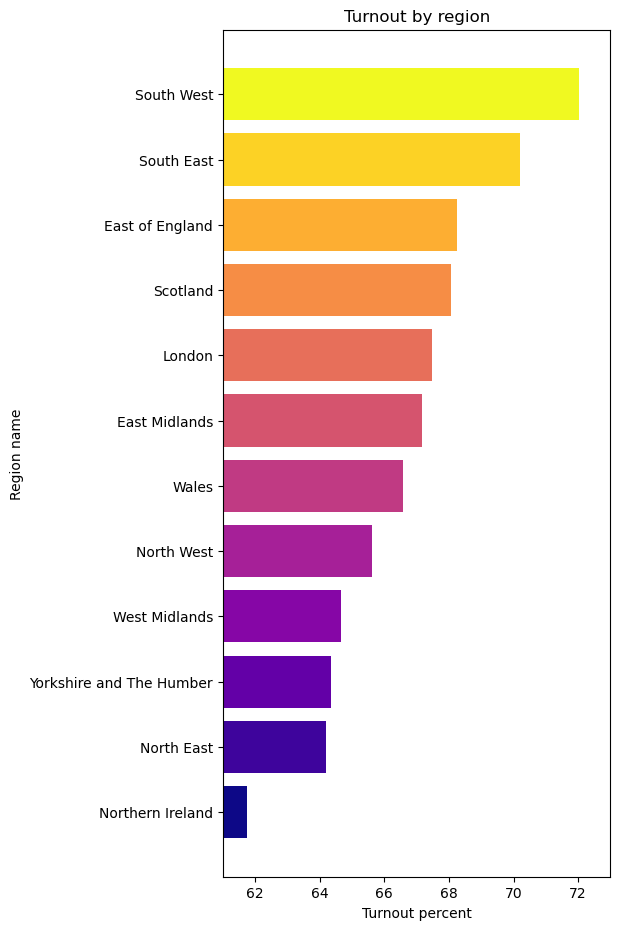

In [6]:
import pandas as pd

grouped = df.groupby(df.iloc[:, 4])


turnout=[]
for name, group in grouped:
    x_values = group.iloc[:, 14]  
    y_values = group.iloc[:, 15]
    xsum = sum(x_values)
    ysum = sum(y_values)
    turnout.append((100*ysum/xsum, name))
plt.figure(figsize=(5, 11))
sorted_turnout = sorted(turnout, key=lambda x: x[0])
percentages = [t[0] for t in sorted_turnout]
names = [t[1] for t in sorted_turnout]
colors = plt.cm.plasma(np.linspace(0, 1, len(percentages)))
plt.barh(names, percentages, color=colors)
plt.xlim(61, 73) 
plt.title('Turnout by region')
plt.xlabel('Turnout percent')
plt.ylabel('Region name')
plt.show()

## Анализ вариации явки в разных регионах и графствах

На представленных диаграммах хорошо видно, как сильно явка избирателей варьируется в зависимости от региона и графства. Эти данные подтверждают значимость экономических и социальных факторов региона для итоговой явки.

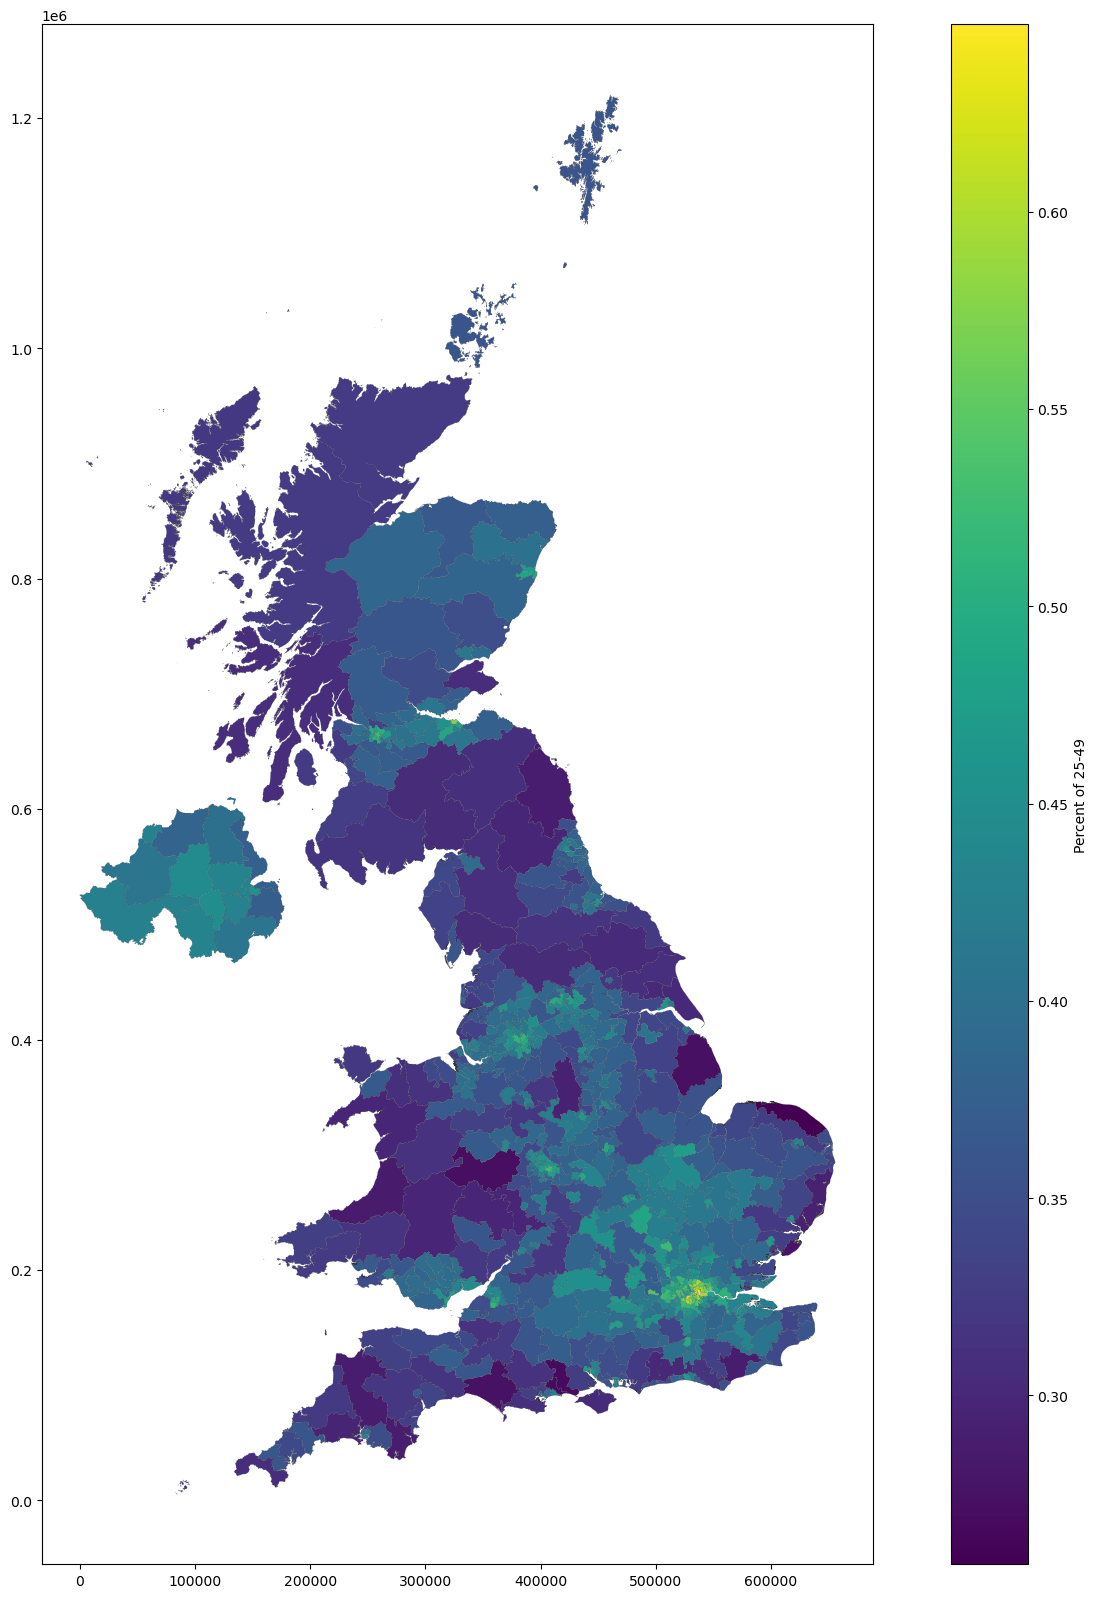

In [89]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm
import pandas as pd

df_second_sheet = pd.read_excel('population_by_age.xlsx', sheet_name=1)
f_df = df_second_sheet.loc[df_second_sheet['age'] == '0 to 17']
f_df = f_df.reset_index(drop=True)
f_df = f_df.iloc[:, [0, 8]]
filtered_df = df_second_sheet[df_second_sheet['age'].isin(['35 to 49', '25 to 34'])]
new_df = filtered_df.groupby('con_code')['con_pc'].sum().reset_index()
new_df['con_pc'] = new_df['con_pc'] / (1.0 - f_df['con_pc'])
elections = gpd.read_file('WPC_Dec_2019.geojson')
new_df.columns = ['pcon19cd', 'young_percentage']
merged_data = elections.merge(new_df, on='pcon19cd', how='left')
fig, ax = plt.subplots(figsize=(20, 20))
merged_data.plot(ax=ax, column='young_percentage', cmap='viridis', linewidth=0.1, edgecolor='0.2',figsize=(20,20))
norm = Normalize(vmin=merged_data['young_percentage'].min(), vmax=merged_data['young_percentage'].max())
sm = cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Percent of 25-49')
plt.show()

## Анализ значимости возрастных групп для явки на выборах в Великобритании

### Методика анализа

Для исследования влияния демографических факторов на явку избирателей использовалась модель линейной регрессии. Основная цель анализа — определить, какие возрастные группы наиболее существенно влияют на уровень явки.

### Отбор признаков

При выборе признаков для модели был использован подход, максимизирующий \( R^2 \), что позволило уточнить модель и сделать выводы более надежными. Были рассмотрены группы 18-24, 25-34, 35-49, 50-64

### Результаты анализа

Исследование показало, что наибольшее влияние на явку оказывает возрастная группа **25-34 лет**, причём в отрицательную сторону с коэффициентом меньше -2.

Также здесь представлен трехмерный график с регрессией по группам 25-34, 35-49


               percent 18-24  percent 25-34  percent 35-49  percent 50-64
percent 18-24       1.000000       0.282187       0.122252      -0.708485
percent 25-34       0.282187       1.000000       0.733317      -0.609837
percent 35-49       0.122252       0.733317       1.000000      -0.519663
percent 50-64      -0.708485      -0.609837      -0.519663       1.000000


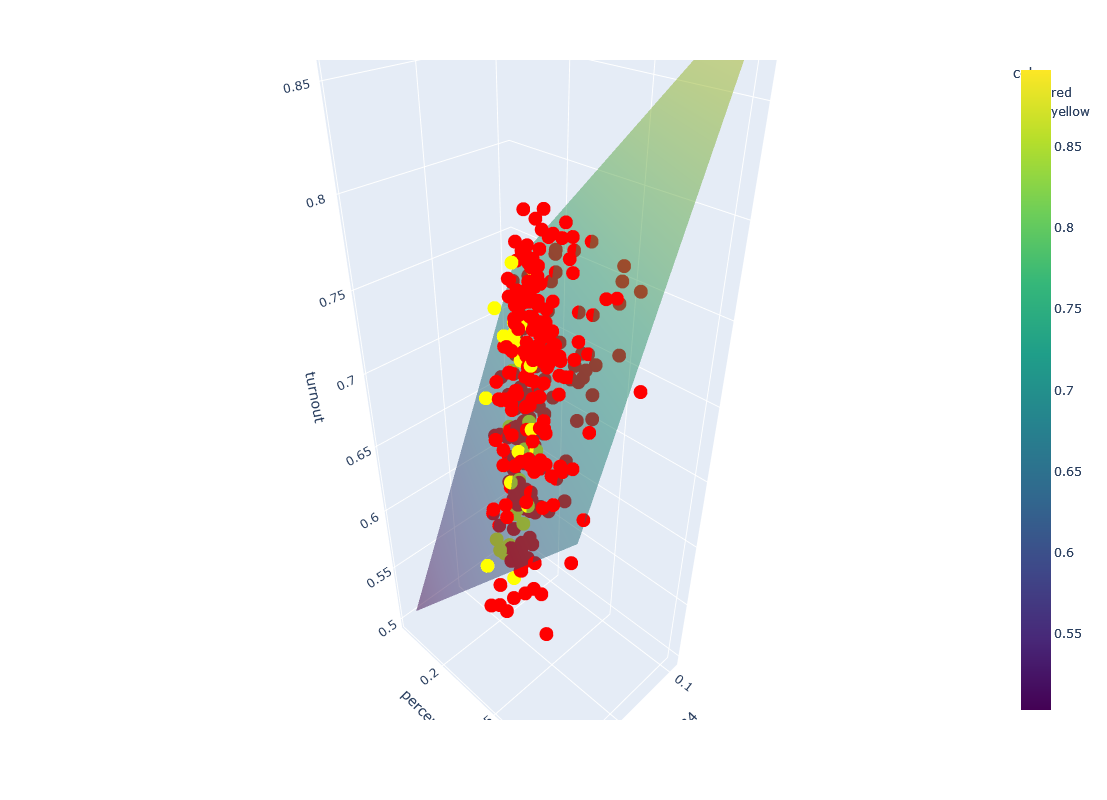



a = [-2.343759    1.19313275] b = 0.7586658766160783
RMSE для Index(['percent 25-34', 'percent 35-49'], dtype='object'): 0.035
MAE для Index(['percent 25-34', 'percent 35-49'], dtype='object'): 0.028
R^2 для Index(['percent 25-34', 'percent 35-49'], dtype='object'): 0.470
R^2 adj для Index(['percent 25-34', 'percent 35-49'], dtype='object'): 0.463
Оптимальное количество признаков: 3
Маска выбранных признаков: [False  True  True  True]
Ранжирование признаков (1 - наиболее важный): [2 1 1 1]
[-2.48823409  1.18987141 -0.44943817  0.90049473]
[-2.65067817  1.13689811 -0.80861905  1.03087564]
[-2.69313503  1.21970479 -0.83413412  1.02314032]
[-2.45694457  1.09406712 -0.62639137  0.96494365]
RMSE для каждого из 4 фолдов: 0.03 0.03 0.04 0.04 Средний RMSE для Index(['percent 25-34', 'percent 35-49', 'percent 50-64'], dtype='object'): 0.036
MAE для каждого из 4 фолдов: 0.02 0.03 0.03 0.03 Средний RMSE для Index(['percent 25-34', 'percent 35-49', 'percent 50-64'], dtype='object'): 0.028
R^2 дл

In [210]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
import plotly.express as px
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, make_scorer
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math
from sklearn.feature_selection import RFECV

def r2_score_adj(y_true, y_pred, best):
    n = len(y_true)
    p = best
    r2 = r2_score(y_true, y_pred)
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p))
    return adjusted_r2


df_second_sheet = pd.read_excel('population_by_age.xlsx', sheet_name=1)
f_df = df_second_sheet.loc[df_second_sheet['age'] == '0 to 17']
f_df = f_df.reset_index(drop=True)
f_df = f_df.iloc[:, [0, 8]]

filtered_df = df_second_sheet[df_second_sheet['age'].isin(['18 to 24'])]
new_df = filtered_df.groupby('con_code')['con_pc'].sum().reset_index()
new_df['con_pc'] = new_df['con_pc'] / (1.0 - f_df['con_pc'])
new_df.columns = ['pcon19cd', 'percent 18-24']

filtered_df1 = df_second_sheet[df_second_sheet['age'].isin(['25 to 34'])]
new_df1 = filtered_df1.groupby('con_code')['con_pc'].sum().reset_index()
new_df1['con_pc'] = new_df1['con_pc'] / (1.0 - f_df['con_pc'])
new_df1.columns = ['pcon19cd', 'percent 25-34']

filtered_df2 = df_second_sheet[df_second_sheet['age'].isin(['35 to 49'])]
new_df2 = filtered_df2.groupby('con_code')['con_pc'].sum().reset_index()
new_df2['con_pc'] = new_df2['con_pc'] / (1.0 - f_df['con_pc'])
new_df2.columns = ['pcon19cd', 'percent 35-49']

filtered_df3 = df_second_sheet[df_second_sheet['age'].isin(['50 to 64'])]
new_df3 = filtered_df3.groupby('con_code')['con_pc'].sum().reset_index()
new_df3['con_pc'] = new_df3['con_pc'] / (1.0 - f_df['con_pc'])
new_df3.columns = ['pcon19cd', 'percent 50-64']

file_path = "HoC-GE2019-results-by-constituency.csv"
df = pd.read_csv(file_path)
df['Country name']= df.iloc[:, 5].replace({'England':'red', 'Wales':'yellow', 'Scotland':'blue', 'Northern Ireland':'green'})
df = df.sort_values(by=df.columns[0])
df = df[df['Constituency type'] == 'County']
df = df[df['Country name'].isin(['red', 'yellow'])]
df = df[df['Region name'] != 'London']

df = df.reset_index(drop=True)


new_df = new_df.sort_values(by=new_df.columns[0])
new_df = new_df[new_df.iloc[:, 0].isin(df.iloc[:, 0])]
new_df = new_df.reset_index(drop=True)
young = new_df['percent 18-24']

new_df1 = new_df1.sort_values(by=new_df1.columns[0])
new_df1 = new_df1[new_df1.iloc[:, 0].isin(df.iloc[:, 0])]
new_df1 = new_df1.reset_index(drop=True)
young1 = new_df1['percent 25-34']

new_df2 = new_df2.sort_values(by=new_df2.columns[0])
new_df2 = new_df2[new_df2.iloc[:, 0].isin(df.iloc[:, 0])]
new_df2 = new_df2.reset_index(drop=True)
young2 = new_df2['percent 35-49']

new_df3 = new_df3.sort_values(by=new_df3.columns[0])
new_df3 = new_df3[new_df3.iloc[:, 0].isin(df.iloc[:, 0])]
new_df3 = new_df3.reset_index(drop=True)
young3 = new_df3['percent 50-64']



combined_df = pd.concat([young, young1, young2, young3], axis=1)
correlation_matrix = combined_df.corr()
print(correlation_matrix)

x_values = df.iloc[:, 14]  
y_values = df.iloc[:, 15] 
z_values = y_values/x_values


fig = px.scatter_3d(x=combined_df.iloc[:, 1], y=combined_df.iloc[:, 2], z=z_values, color=df['Country name'], 
                    color_discrete_sequence=['red', 'yellow'], size_max=0.1, width=1200, height=800)
fig.update_layout(scene=dict(xaxis_title=combined_df.columns[1], yaxis_title=combined_df.columns[2], zaxis_title='turnout'))

x_train, x_test, y_train, y_test = train_test_split(combined_df.iloc[:, [1,2]], z_values, test_size=0.25, random_state = 25)

model = LinearRegression()
model.fit(x_train, y_train)
a = model.coef_
b = model.intercept_

coef = model.coef_
intercept = model.intercept_
x_grid, y_grid = np.meshgrid(np.linspace(x_train.iloc[:, 0].min(), x_train.iloc[:, 0].max(), 100),
                             np.linspace(x_train.iloc[:, 1].min(), x_train.iloc[:, 1].max(), 100))
z_plane = coef[0] * x_grid + coef[1] * y_grid + intercept
fig.add_trace(go.Surface(x=x_grid, y=y_grid, z=z_plane, opacity=0.5, colorscale='viridis'))
fig.show()  

print(f"\n\na = {a} b = {b}")

y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print(f"RMSE для {x_train.columns}: {rmse:.3f}")
print(f"MAE для {x_train.columns}: {mean_absolute_error(y_test, y_pred):.3f}")
print(f"R^2 для {x_train.columns}: {r2_score(y_test, y_pred):.3f}")
print(f"R^2 adj для {x_train.columns}: {r2_score_adj(y_test, y_pred, 2):.3f}")

X = combined_df
y = z_values
n_splits=4
kf = KFold(n_splits=n_splits, shuffle=True, random_state=20)
    
model = LinearRegression()
selector = RFECV(estimator=model, step=1, cv=kf, scoring='r2')
selector.fit(X, y)
print("Оптимальное количество признаков:", selector.n_features_)
print("Маска выбранных признаков:", selector.support_)
print("Ранжирование признаков (1 - наиболее важный):", selector.ranking_)
rmse_scores = []
mae_scores = []
r2_scores = []
adj_r2_scores = []
ind = 0
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    X_train_selected = selector.transform(X_train)
    X_test_selected = selector.transform(X_test)
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)

    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)
    adj_r2_scores.append(r2_score_adj(y_test, y_pred, selector.n_features_))
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mae_scores.append(mae)
    rmse_scores.append(np.sqrt(mse))
       
    coef = model.coef_
    intercept = model.intercept_
    coef = np.append(coef, intercept)
    print(coef)
    
    
print(f"RMSE для каждого из {n_splits} фолдов:", end = " ")
for num in rmse_scores:
    print("{:.2f}".format(num), end=" ")
print(f"Средний RMSE для {X.columns[selector.support_]}: {np.mean(rmse_scores):.3f}")
    
print(f"MAE для каждого из {n_splits} фолдов:", end = " ")
for num in mae_scores:
     print("{:.2f}".format(num), end=" ")
print(f"Средний RMSE для {X.columns[selector.support_]}: {np.mean(mae_scores):.3f}")
    

print(f"R^2 для каждого из {n_splits} фолдов:", end = " ")
for num in r2_scores:
       print("{:.3f}".format(num), end=" ")
print(f"Средний R^2 для {X.columns[selector.support_]}: {np.mean(r2_scores):.3f}")

print(f"adj R^2 для каждого из {n_splits} фолдов:", end = " ")
for num in adj_r2_scores:
       print("{:.3f}".format(num), end=" ")
print(f"Средний adj R^2 для {X.columns[selector.support_]}: {np.mean(adj_r2_scores):.3f}")    











## Заключительный анализ зависимости явки от возрастных групп по регионам

### Обзор исследования

В заключительной части исследования была протестирована зависимость явки от различных возрастных групп в провинциальных районах разных регионов страны. Среди всех анализируемых регионов наиболее стабильные результаты показал Уэльс.

### Проблема гетероскедастичности

Анализ выявил тенденцию к Гетероскедастичности — нестабильности дисперсии ошибок модели, что может существенно повлиять на надежность модели.

### Стабилизация дисперсии

Для стабилизации дисперсии и обеспечения гомоскедастичности результатов было предложено применение логарифмирования зависимой переменной (уровня явки). Логарифмирование часто используется в статистическом анализе для уменьшения влияния выбросов и минимизации проблемы неоднородности дисперсии.

### Заключение

Возрастная группа 25-34 действительно показала хорошие результаты на Англии и Уэльсе, примечательно, что Результат Северной Ирландии полностью противоположен двум указанным группам. Это может говорить о сильной специфике этого региона, где ключевую роль в явке могут играть другие социальные факторы.

            Constituency name     urban
0                Amber Valley  0.000000
1     Arundel and South Downs  0.000000
2                    Ashfield  0.000000
3           Ashton-Under-Lyne  0.020073
4                     Banbury  0.000000
..                        ...       ...
214  Wolverhampton South West  0.000000
215                Workington  0.000000
216  Worsley and Eccles South  0.000000
217               Wyre Forest  0.000000
218                    Yeovil  0.000000

[219 rows x 2 columns]
RMSE для каждого из 4 фолдов: 4.221 4.627 4.814 4.277 Средний RMSE для percent of 25-34: 4.485
MAE для каждого из 4 фолдов: 3.231 3.937 3.779 3.549 Средний MAE для percent of 25-34: 3.624
R^2 для каждого из 4 фолдов: 0.441 0.342 0.341 0.373 Средний R^2 для percent of 25-34: 0.374
adj R^2 для каждого из 4 фолдов: 0.441 0.342 0.341 0.373 Средний adj R^2 для percent of 25-34: 0.374


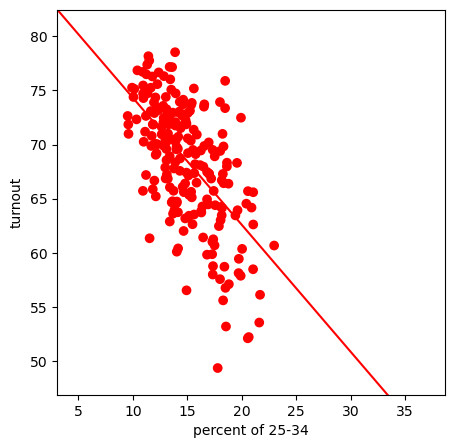

RMSE для каждого из 4 фолдов: 1.800 1.988 2.056 1.839 Средний RMSE для percent of 25-34: 1.921
MAE для каждого из 4 фолдов: 1.387 1.695 1.616 1.528 Средний MAE для percent of 25-34: 1.557
R^2 для каждого из 4 фолдов: 0.443 0.342 0.340 0.371 Средний R^2 для percent of 25-34: 0.374
adj R^2 для каждого из 4 фолдов: 0.443 0.342 0.340 0.371 Средний adj R^2 для percent of 25-34: 0.374


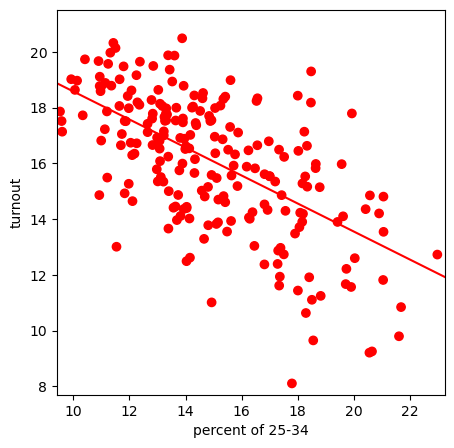

                          Constituency name     urban
0                                  Ynys Môn  0.000000
1                                     Delyn  0.000000
2                          Alyn and Deeside  0.060655
3                                   Wrexham  0.746088
4                                  Llanelli  0.000000
5                                     Gower  0.000000
6                                  Aberavon  0.000000
7                                   Rhondda  0.000000
8                                   Torfaen  0.000000
9                                  Monmouth  0.000000
10                             Newport East  0.713122
11                             Newport West  0.854985
12                                    Arfon  0.000000
13                                Aberconwy  0.000000
14                               Clwyd West  0.000000
15                            Vale Of Clwyd  0.000000
16                       Dwyfor Meirionnydd  0.000000
17                          

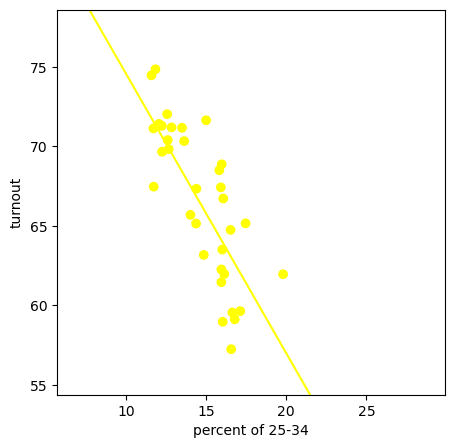

RMSE для каждого из 4 фолдов: 1.384 0.833 1.599 1.290 Средний RMSE для percent of 25-34: 1.277
MAE для каждого из 4 фолдов: 1.231 0.705 1.399 1.095 Средний MAE для percent of 25-34: 1.108
R^2 для каждого из 4 фолдов: 0.525 0.731 0.105 0.617 Средний R^2 для percent of 25-34: 0.494
adj R^2 для каждого из 4 фолдов: 0.525 0.731 0.105 0.617 Средний adj R^2 для percent of 25-34: 0.494


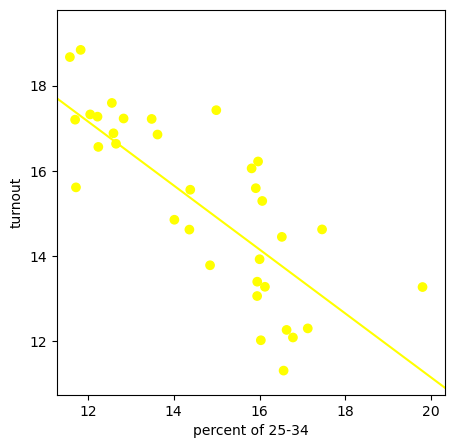

RMSE для каждого из 4 фолдов: 4.304 2.378 4.361 4.360 Средний RMSE для percent of 35-49: 3.851
MAE для каждого из 4 фолдов: 3.746 2.194 3.353 3.755 Средний MAE для percent of 35-49: 3.262
R^2 для каждого из 4 фолдов: 0.157 0.597 -0.201 0.197 Средний R^2 для percent of 35-49: 0.188
adj R^2 для каждого из 4 фолдов: 0.157 0.597 -0.201 0.197 Средний adj R^2 для percent of 35-49: 0.188


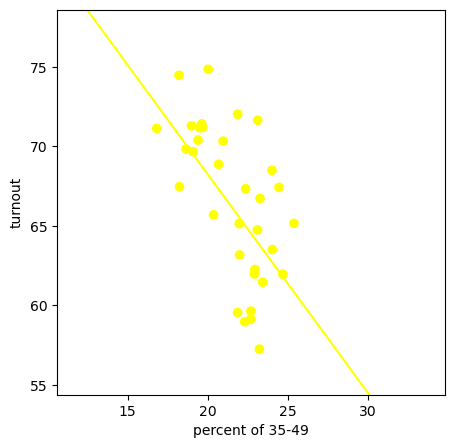

RMSE для каждого из 4 фолдов: 1.838 1.015 1.853 1.867 Средний RMSE для percent of 35-49: 1.643
MAE для каждого из 4 фолдов: 1.599 0.939 1.432 1.607 Средний MAE для percent of 35-49: 1.394
R^2 для каждого из 4 фолдов: 0.161 0.600 -0.202 0.197 Средний R^2 для percent of 35-49: 0.189
adj R^2 для каждого из 4 фолдов: 0.161 0.600 -0.202 0.197 Средний adj R^2 для percent of 35-49: 0.189


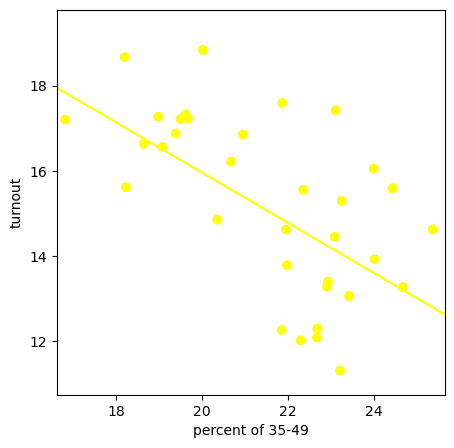

RMSE для каждого из 4 фолдов: 5.147 3.321 5.078 4.504 Средний RMSE для percent of 50-64: 4.512
MAE для каждого из 4 фолдов: 4.681 2.898 4.240 3.598 Средний MAE для percent of 50-64: 3.854
R^2 для каждого из 4 фолдов: -0.206 0.214 -0.628 0.144 Средний R^2 для percent of 50-64: -0.119
adj R^2 для каждого из 4 фолдов: -0.206 0.214 -0.628 0.144 Средний adj R^2 для percent of 50-64: -0.119


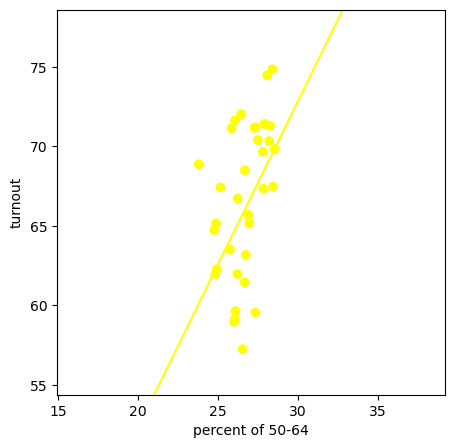

RMSE для каждого из 4 фолдов: 2.201 1.418 2.160 1.927 Средний RMSE для percent of 50-64: 1.926
MAE для каждого из 4 фолдов: 2.000 1.234 1.809 1.545 Средний MAE для percent of 50-64: 1.647
R^2 для каждого из 4 фолдов: -0.203 0.220 -0.632 0.144 Средний R^2 для percent of 50-64: -0.118
adj R^2 для каждого из 4 фолдов: -0.203 0.220 -0.632 0.144 Средний adj R^2 для percent of 50-64: -0.118


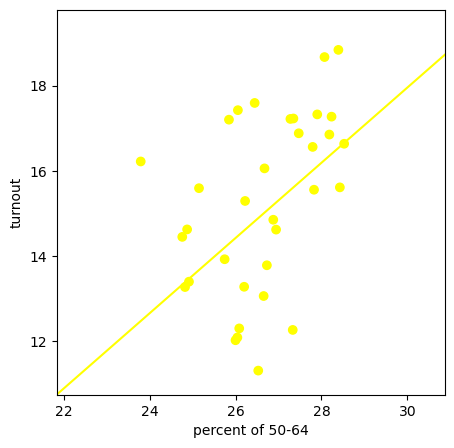

             Constituency name  urban
0                  East Antrim    0.0
1             East Londonderry    0.0
2   Fermanagh and South Tyrone    0.0
3                        Foyle    0.0
4                 Lagan Valley    0.0
5                   Mid Ulster    0.0
6             Newry and Armagh    0.0
7                 North Antrim    0.0
8                   North Down    0.0
9                 South Antrim    0.0
10                  South Down    0.0
11                  Strangford    0.0
12                  Upper Bann    0.0
13                 West Tyrone    0.0
RMSE для каждого из 4 фолдов: 2.964 5.686 3.210 2.356 Средний RMSE для percent of 25-34: 3.554
MAE для каждого из 4 фолдов: 2.197 4.875 2.952 2.340 Средний MAE для percent of 25-34: 3.091
R^2 для каждого из 4 фолдов: -0.492 -1.827 -0.372 -3.113 Средний R^2 для percent of 25-34: -1.451
adj R^2 для каждого из 4 фолдов: -0.492 -1.827 -0.372 -3.113 Средний adj R^2 для percent of 25-34: -1.451


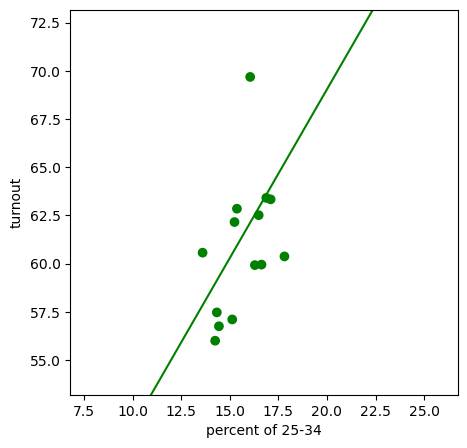

RMSE для каждого из 4 фолдов: 1.247 2.402 1.336 0.994 Средний RMSE для percent of 25-34: 1.495
MAE для каждого из 4 фолдов: 0.928 2.050 1.227 0.987 Средний MAE для percent of 25-34: 1.298
R^2 для каждого из 4 фолдов: -0.518 -1.772 -0.378 -3.262 Средний R^2 для percent of 25-34: -1.483
adj R^2 для каждого из 4 фолдов: -0.518 -1.772 -0.378 -3.262 Средний adj R^2 для percent of 25-34: -1.483


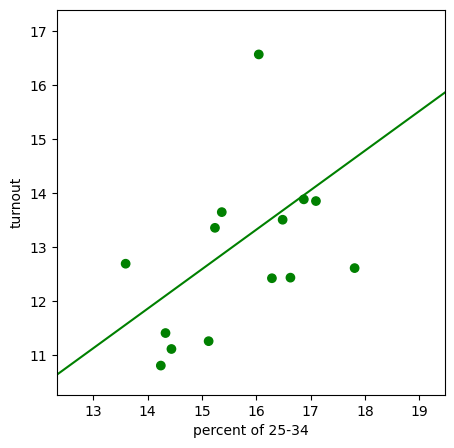

RMSE для каждого из 4 фолдов: 2.434 4.732 1.722 3.017 Средний RMSE для percent of 35-49: 2.976
MAE для каждого из 4 фолдов: 2.160 3.810 1.631 2.564 Средний MAE для percent of 35-49: 2.541
R^2 для каждого из 4 фолдов: -0.006 -0.957 0.605 -5.744 Средний R^2 для percent of 35-49: -1.526
adj R^2 для каждого из 4 фолдов: -0.006 -0.957 0.605 -5.744 Средний adj R^2 для percent of 35-49: -1.526


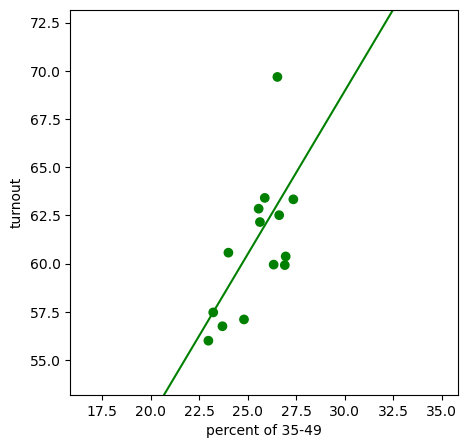

RMSE для каждого из 4 фолдов: 1.022 2.008 0.711 1.271 Средний RMSE для percent of 35-49: 1.253
MAE для каждого из 4 фолдов: 0.908 1.609 0.672 1.080 Средний MAE для percent of 35-49: 1.067
R^2 для каждого из 4 фолдов: -0.021 -0.937 0.610 -5.971 Средний R^2 для percent of 35-49: -1.580
adj R^2 для каждого из 4 фолдов: -0.021 -0.937 0.610 -5.971 Средний adj R^2 для percent of 35-49: -1.580


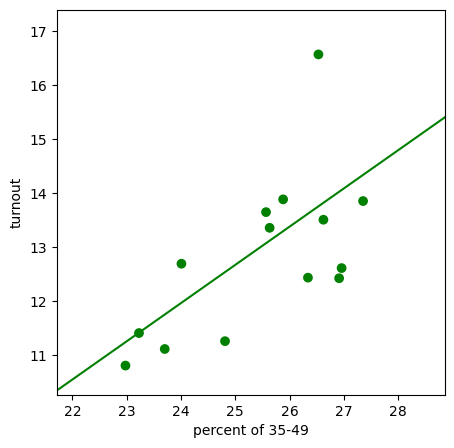

RMSE для каждого из 4 фолдов: 2.702 4.374 2.258 2.808 Средний RMSE для percent of 50-64: 3.036
MAE для каждого из 4 фолдов: 2.460 3.183 2.086 2.800 Средний MAE для percent of 50-64: 2.632
R^2 для каждого из 4 фолдов: -0.240 -0.673 0.321 -4.842 Средний R^2 для percent of 50-64: -1.358
adj R^2 для каждого из 4 фолдов: -0.240 -0.673 0.321 -4.842 Средний adj R^2 для percent of 50-64: -1.358


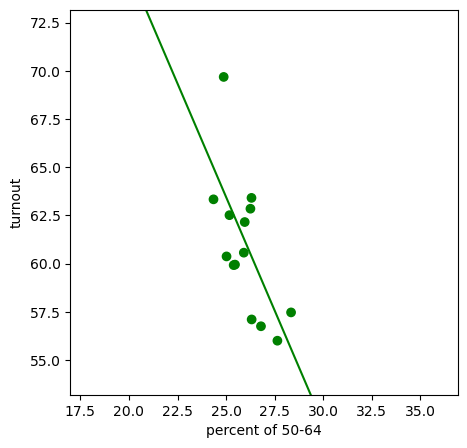

RMSE для каждого из 4 фолдов: 1.133 1.861 0.934 1.184 Средний RMSE для percent of 50-64: 1.278
MAE для каждого из 4 фолдов: 1.034 1.348 0.862 1.181 Средний MAE для percent of 50-64: 1.106
R^2 для каждого из 4 фолдов: -0.253 -0.665 0.326 -5.041 Средний R^2 для percent of 50-64: -1.408
adj R^2 для каждого из 4 фолдов: -0.253 -0.665 0.326 -5.041 Средний adj R^2 для percent of 50-64: -1.408


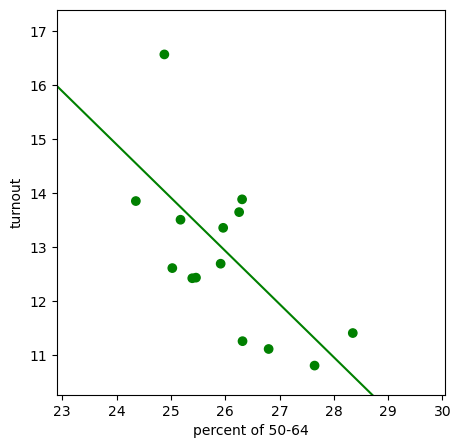

In [215]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
import plotly.express as px
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, make_scorer
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
import math
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import PolynomialFeatures

def huber_loss(y_true, y_pred, delta):
    error = y_true - y_pred
    abs_error = np.abs(error)
    quadratic_part = np.minimum(abs_error, delta)
    linear_part = abs_error - quadratic_part
    loss = 0.5 * quadratic_part**2 + delta * linear_part
    return np.mean(loss)

def adjusted_r2_score(y_true, y_pred, n, p):
    r2 = r2_score(y_true, y_pred)
    if n <= p:
        return -np.inf
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p))
    return adjusted_r2


def r2_score_adj(y_true, y_pred, best):
    n = len(y_true)
    p = best
    r2 = r2_score(y_true, y_pred)
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p))
    return adjusted_r2

def g(name):
    file_path = "pcon-classification-csv.csv"
    classif = pd.read_csv(file_path)
    classif = classif.pivot_table(index=['constituency_code','constituency_name'], columns='classification', values='percent_of_constituency', aggfunc='sum')
    classif.reset_index(inplace=True)
    
    df_second_sheet = pd.read_excel('population_by_age.xlsx', sheet_name=1)
    f_df = df_second_sheet.loc[df_second_sheet['age'] == '0 to 17']
    f_df = f_df.reset_index(drop=True)
    f_df = f_df.iloc[:, [0, 8]]
    
    filtered_df = df_second_sheet[df_second_sheet['age'].isin(['18 to 24'])]
    new_df = filtered_df.groupby('con_code')['con_pc'].sum().reset_index()
    new_df['con_pc'] = new_df['con_pc'] / (1.0 - f_df['con_pc'])
    new_df.columns = ['pcon19cd', 'percent of 18-24']
    
    filtered_df1 = df_second_sheet[df_second_sheet['age'].isin(['25 to 34'])]
    new_df1 = filtered_df1.groupby('con_code')['con_pc'].sum().reset_index()
    new_df1['con_pc'] = new_df1['con_pc'] / (1.0 - f_df['con_pc'])
    new_df1.columns = ['pcon19cd', 'percent of 25-34']
    
    filtered_df2 = df_second_sheet[df_second_sheet['age'].isin(['35 to 49'])]
    new_df2 = filtered_df2.groupby('con_code')['con_pc'].sum().reset_index()
    new_df2['con_pc'] = new_df2['con_pc'] / (1.0 - f_df['con_pc'])
    new_df2.columns = ['pcon19cd', 'percent of 35-49']
    
    filtered_df3 = df_second_sheet[df_second_sheet['age'].isin(['50 to 64'])]
    new_df3 = filtered_df3.groupby('con_code')['con_pc'].sum().reset_index()
    new_df3['con_pc'] = new_df3['con_pc'] / (1.0 - f_df['con_pc'])
    new_df3.columns = ['pcon19cd', 'percent of 50-64']
    
    file_path = "HoC-GE2019-results-by-constituency.csv"
    df = pd.read_csv(file_path)
    df['Country name']= df.iloc[:, 5].replace({'England':'red', 'Wales':'yellow', 'Scotland':'blue', 'Northern Ireland':'green'})
    df = df.sort_values(by=df.columns[0])
    classif.rename(columns={'constituency_code': 'ONS ID','constituency_name': 'Constituency name'}, inplace=True)

    df = pd.merge(df, classif[['ONS ID', 'Core City (London)',
       'Core City (outside London)', 'Large Town', 'Medium Town', 'Other City',
       'Small Town']], on='ONS ID', how='left')

    df['urban'] = df[['Core City (London)', 'Core City (outside London)', 'Large Town']].sum(axis=1)

    
    
    #df = df[df['Constituency type'] == 'County']
    #df = df[df['Region name'] != 'London']
    if name == 'red':
        df = df[df['Country name'] == 'red']
        df = df[df['urban'] < 0.03]
     
    if name == 'green':
        df = df[df['Constituency type'] == 'County']
        df = df[df['Country name'] == 'green']

    if name == 'yellow':
        df = df[df['Constituency type'] == 'County']
        df = df[df['Country name'] == 'yellow']

    if name == 'blue':
        df = df[df['Constituency type'] == 'County']
        df = df[df['Country name'] == 'blue']
        
        
    
    df = df.reset_index(drop=True)
    print(df[['Constituency name','urban']])
 
    new_df = new_df.sort_values(by=new_df.columns[0])
    new_df = new_df[new_df.iloc[:, 0].isin(df.iloc[:, 0])]
    new_df = new_df.reset_index(drop=True)
    young = new_df[['percent of 18-24']]
    
    new_df1 = new_df1.sort_values(by=new_df1.columns[0])
    new_df1 = new_df1[new_df1.iloc[:, 0].isin(df.iloc[:, 0])]
    new_df1 = new_df1.reset_index(drop=True)
    young1 = new_df1[['percent of 25-34']]
    
    new_df2 = new_df2.sort_values(by=new_df2.columns[0])
    new_df2 = new_df2[new_df2.iloc[:, 0].isin(df.iloc[:, 0])]
    new_df2 = new_df2.reset_index(drop=True)
    young2 = new_df2[['percent of 35-49']]
    
    new_df3 = new_df3.sort_values(by=new_df3.columns[0])
    new_df3 = new_df3[new_df3.iloc[:, 0].isin(df.iloc[:, 0])]
    new_df3 = new_df3.reset_index(drop=True)
    young3 = new_df3[['percent of 50-64']]
    
    x_values = df.iloc[:, 14]  
    y_values = df.iloc[:, 15] 
    z_values = y_values/x_values
    
    def f(X, y):
        plt.figure(figsize = (5,5))
        plt.scatter(x=X, y=y, color=df['Country name'])
        #plt.xlim(0, 0.4)
        
        #plt.ylim(0.45, 0.85)

        plt.ylim(y.min()*0.95, y.max()*1.05)
        b = y.max()*1.05 -y.min()*0.95
        b = b + 2*X[X.columns[0]].min()
        b = b / (X[X.columns[0]].min() + X[X.columns[0]].max())
        plt.xlim(X[X.columns[0]].min()*(2-b), X[X.columns[0]].max()*b)
      
        
        plt.title("")
        plt.xlabel(X.columns[0])
        plt.ylabel("turnout")
        n_splits=4
        kf = KFold(n_splits=n_splits, shuffle=True, random_state=10)

        best_degree = 1
        rmse_scores = []
        mae_scores = []
        r2_scores = []
        adj_r2_scores = []
        ans = []
        ind = 0
        for train_index, test_index in kf.split(X):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            best_pipeline = Pipeline([('poly', PolynomialFeatures(degree=best_degree, include_bias=False)),
            #('lin_reg', HuberRegressor(epsilon=2,max_iter=1000))
            ('lin_reg', LinearRegression())
            ])
            best_pipeline.fit(X_train, y_train)
            y_pred = best_pipeline.predict(X_test)
            coef = best_pipeline.named_steps['lin_reg'].coef_
            intercept = best_pipeline.named_steps['lin_reg'].intercept_
            coef = np.append(coef, intercept)
            #print(coef)
            ans.append(coef)
            mae = mean_absolute_error(y_test, y_pred)
            mae_scores.append(mae)
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))
            rmse_scores.append(rmse)
            r2 = r2_score(y_test, y_pred)
            r2_scores.append(r2)
            adj_r2 = r2_score_adj(y_test, y_pred, best_degree)
            adj_r2_scores.append(adj_r2)
            ind += 1
            if ind == 1:
                X_curve = np.linspace(0, 100, 300)
                df_curve = pd.DataFrame(X_curve, columns=[X.columns[0]])
                df_curve = df_curve.copy()
                y_curve = best_pipeline.predict(df_curve)
                plt.plot(df_curve, y_curve, color=name)
            
        print(f"RMSE для каждого из {n_splits} фолдов:", end = " ")
        for num in rmse_scores:
            print("{:.3f}".format(num), end=" ")
        print(f"Средний RMSE для {X.columns[0]}: {np.mean(rmse_scores):.3f}")
            
        print(f"MAE для каждого из {n_splits} фолдов:", end = " ")
        for num in mae_scores:
             print("{:.3f}".format(num), end=" ")
        print(f"Средний MAE для {X.columns[0]}: {np.mean(mae_scores):.3f}")
            
        
        print(f"R^2 для каждого из {n_splits} фолдов:", end = " ")
        for num in r2_scores:
               print("{:.3f}".format(num), end=" ")
        print(f"Средний R^2 для {X.columns[0]}: {np.mean(r2_scores):.3f}")
        print(f"adj R^2 для каждого из {n_splits} фолдов:", end = " ")
        for num in adj_r2_scores:
               print("{:.3f}".format(num), end=" ")
        print(f"Средний adj R^2 для {X.columns[0]}: {np.mean(adj_r2_scores):.3f}")
        
        plt.show()
    if name == 'red' or name == 'blue':
        f(100*young1, 100*z_values)
        f(100*young1, 100-100*np.log((3-z_values)))
        
    else:

        f(100*young1, 100*z_values)
        f(100*young1, 100-100*np.log((3-z_values)))
        f(100*young2,  100*z_values)
        f(100*young2, 100-100*np.log((3-z_values)))
        f(100*young3,  100*z_values)
        f(100*young3, 100-100*np.log((3-z_values)))
g('red')

g('yellow')
g('green')

